In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
import glob
from pathlib import Path as P
import cv2

In [2]:
path_root = "/media/yui/Disk/data/semantic_drone_dataset"
path_color = "training_set/gt/semantic/class_dict.csv"
path_gt = "training_set/gt/semantic/label_images"
path_inp = "training_set/images"

df = pd.read_csv(str(P(path_root)/P(path_color)))
print("Basic data format: ")
print(df.head(3))
print("Number of classes: ",df.shape)

allinp = glob.glob(str(P(path_root)/P(path_inp)/P("*.jpg")))
print("Number of input images: ",len(allinp))

allgt = glob.glob(str(P(path_root)/P(path_gt)/P("*.png")))
print("Number of ground truth images: ",len(allgt))

Basic data format: 
         name    r   g    b
0   unlabeled    0   0    0
1  paved-area  128  64  128
2        dirt  130  76    0
Number of classes:  (24, 4)
Number of input images:  400
Number of ground truth images:  400


In [3]:
print(os.listdir(str(P(path_root)/P(path_inp)))[:5])

['434.jpg', '531.jpg', '559.jpg', '246.jpg', '244.jpg']


8it [00:09,  1.18s/it]


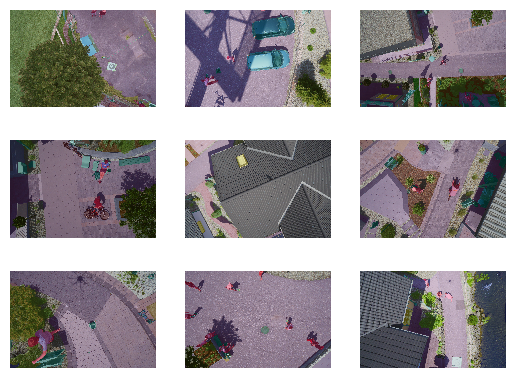

In [4]:
paths = os.listdir(str(P(path_root)/P(path_inp)))
for i,tmp in tqdm(enumerate(paths)):
    tmp = tmp.replace(".jpg","")
    iminp = cv2.imread(str(P(path_root)/P(path_inp)/P(f"{tmp}.jpg")))
    imgt = cv2.imread(str(P(path_root)/P(path_gt)/P(f"{tmp}.png")))[:,:,::-1]
    plt.subplot(3,3,i+1)
    plt.imshow(iminp[:,:,::-1],interpolation='none')
    plt.imshow(imgt,'jet',interpolation='none',alpha=0.3)
    plt.axis("off")
    if i==8:
        break
plt.show()

In [5]:
id2name,id2color,color2id = {},{},{}
for i in range(df.shape[0]):
    id2name[i] = df.iloc[i]['name']
    color = (df.iloc[i][' r'],
        df.iloc[i][' g'],df.iloc[i][' b'])
    id2color[i] = color
    color2id[color] = i
print(id2color)

{0: (0, 0, 0), 1: (128, 64, 128), 2: (130, 76, 0), 3: (0, 102, 0), 4: (112, 103, 87), 5: (28, 42, 168), 6: (48, 41, 30), 7: (0, 50, 89), 8: (107, 142, 35), 9: (70, 70, 70), 10: (102, 102, 156), 11: (254, 228, 12), 12: (254, 148, 12), 13: (190, 153, 153), 14: (153, 153, 153), 15: (255, 22, 96), 16: (102, 51, 0), 17: (9, 143, 150), 18: (119, 11, 32), 19: (51, 51, 0), 20: (190, 250, 190), 21: (112, 150, 146), 22: (2, 135, 115), 23: (255, 0, 0)}


In [6]:
new_shp = imgt.shape[:2]+(len(id2name),)
# imgt = imgt.astype(np.uint8)
print(new_shp)
new_img = np.zeros(new_shp)
print(new_img.shape)
for i,cls in enumerate(id2color):
    new_img[:,:,i] =  np.all(imgt.reshape((-1,3))==id2color[i],
                    axis=1).reshape(new_shp[:2])
#     new_img[np.all(imgt==id2color[i],axis=-1)]=1
#     new_img[:,:,i][imgt==cls]=1
    

(4000, 6000, 24)
(4000, 6000, 24)


In [7]:
id2color[0]

(0, 0, 0)

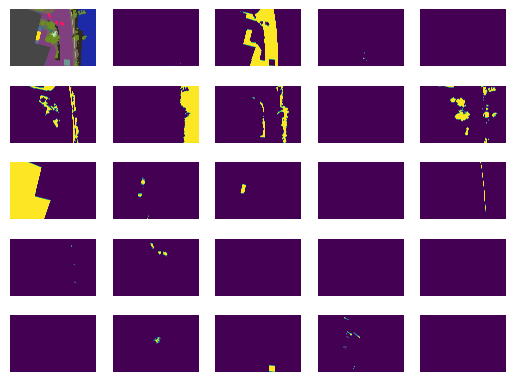

In [8]:
plt.subplot(5,5,1)
plt.imshow(imgt)
plt.axis('off')
for i in range(24):
    plt.subplot(5,5,i+2)
    plt.imshow(new_img[:,:,i])
    plt.axis('off')
plt.show()

In [9]:
new_img.shape

(4000, 6000, 24)

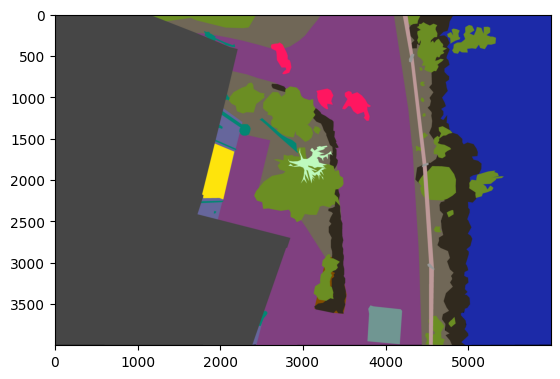

In [10]:
plt.imshow(imgt)
plt.show()